## Introduction

In this project, I embark on an exciting journey of developing machine learning models to predict the outcomes of UFC (Ultimate Fighting Championship) fights. As a passionate mixed martial artist and UFC fan, the idea of utilizing data to forecast the results of matches adds an intriguing layer to my appreciation for the sport. The Ultimate Fighting Championship, founded in 1993, stands as the preeminent mixed martial arts (MMA) organization globally.The UFC serves as a captivating platform where elite athletes showcase their prowess in a multitude of disciplines, including but not limited to boxing, Brazilian jiu-jitsu, wrestling, and Muay Thai. Each fighter brings a unique blend of skills, strategies, and experiences into the iconic Octagon, creating an environment where the unpredictable nature of mixed martial arts unfolds.

This project aims to harness the vast data available from past UFC encounters, including fighter statistics, historical performance, and contextual information, to train models capable of forecasting the likely outcomes of future fights. By leveraging the power of machine learning, I aspire to uncover patterns, trends, and factors that contribute to the success or downfall of fighters in the UFC.


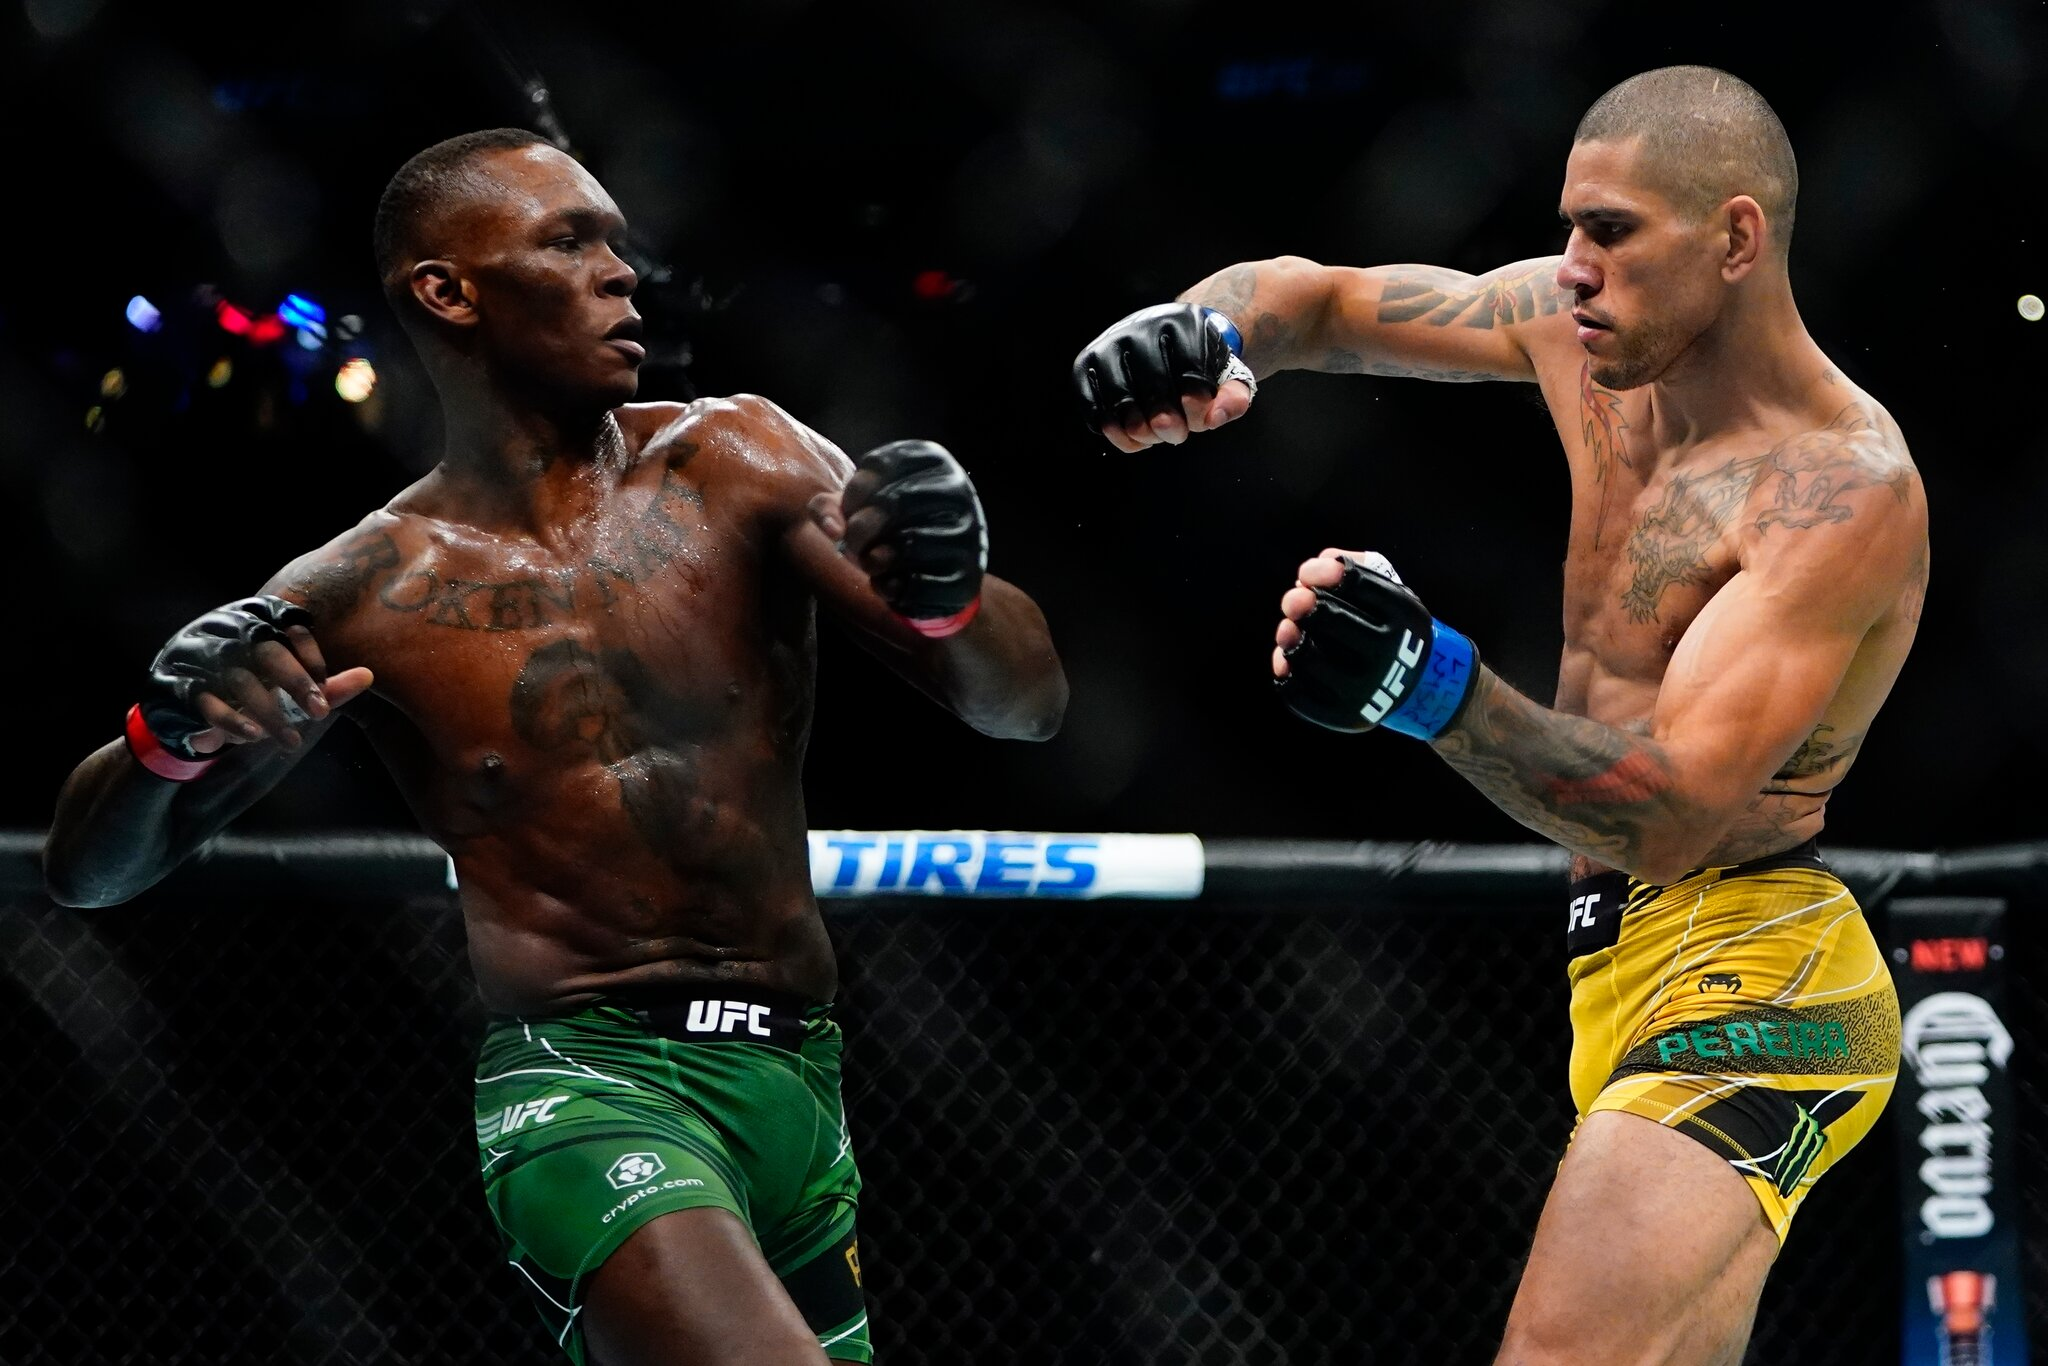

 Fig1 : A picture of a fight between Israel Adesanya (on the left) and Alex Pereira (on the right).

## Dataset Overview

Each row presents a compilation of statistics for both fighters. The fighters are denoted by 'red' and 'blue,' corresponding to the red and blue corners. For example, the red/blue fighter's aggregated average statistics encompass all previous fights, excluding the ongoing one. These statistics encompass the damage inflicted by the red fighter on opponents in all past fights involving this specific red/blue fighter, excluding the current match as it has not yet transpired in the data. The target variable is 'Winner,' the sole column revealing the outcome of the match. The data I am working with is from 2010 to 2022.

Here is the link for the data I am using : https://github.com/andrewritchie05/tiger-millionaire/blob/master/data/kaggle_data/ufc-master.csv

#### Variables Codebook:

The original dataset had 119 features. However, in this codebook, I am only going to include the 30 features that I deemed important for prediction based on exploratory data analysis and knowledge of the sport.

- R_ and B_ prefix signifies red and blue corner fighter stats respectively

- _odds variables signify the betting odds for each fighter.

- _ev variables which stand for expected value signify how much money you would win on a $100 bet if your fighter wins.

- Winner signifies the winner of the fight - blue corner or red corner.

- _Stance variables signify the fighting stance of a fighter. The types of stances are 'Orthodox', 'Switch', 'Southpaw', 'Open Stance'.

- lose_streak_dif -> (Blue lose streak) - (Red lose streak)

- win_streak_dif  -> (Blue win streak) - (Red win streak)

- longest_win_streak_dif -> (Blue longest win streak) - (Red longest win streak)

- win_dif -> (Blue wins) - (Red wins)

- loss_dif -> (Blue losses) - (Red losses)

- draw_diff -> (Blue draws) - (Red draws)

- total_round_dif -> (Blue rounds fought) - (Red rounds fought)

- total_title_bout_dif -> (Blue number of title fights) - (Red number of title fights)

- ko_dif -> (Blue wins by KO/TKO) - (Red wins by KO/TKO)

- sub_dif -> (Blue wins by submission) - (Red wins by submission)

- height_dif -> (Blue height) - (Red height) in cms

- reach_dif -> (Blue reach) - (Red reach) in cms

- age_dif -> (Blue age) - (Red age)

- sig_str_dif -> (Blue sig strikes per minute) - (Red sig strikes per minute)

- avg_sub_att_dif -> (Blue submission attempts) - (Red submission attempts)

- avg_td_dif -> (Blue Takedown attempts) - (Red Takedown attempts)

- sig_str_pct_diff -> (Blue Significant Striking Accuracy) - (Red Significant Striking Accuracy)

- avg_td_pct_diff -> (Blue Takedown Accuracy) - (Red Takedown Accuracy)
  
- _dec_odds variables signify the odds for a fighter to win by a judges decision.

- _sub_odds variables signify the odds for a fighter to win by submission.

- _ko_odds variables signify the odds for a fighter to win by knockout/technical knockout (ko/tko)		



## Data preprocessing 

The data for the column avg_SIG_STR_landed for both Blue and Red fighters, after the fight between Henry Cejudo and Marlon Moraes, was avg_str_landed per fight rather than per minute. Since UFC stores stats for average sigificant strikes by the minute, I changed all the data for those rows to that format. In addition, I dropped all the columns that were unnecessary and common to both fighters like gender, country,etc.




In [ ]:
# ufc_new = pd.read_csv("data/ufc-master_new.csv")

# cols_to_drop = ['country','location','weight_class','gender','empty_arena','constant_1','B_match_weightclass_rank',
#                 'R_match_weightclass_rank',"R_Women's Flyweight_rank",
#                  "R_Women's Featherweight_rank", "R_Women's Strawweight_rank","R_Women's Bantamweight_rank",'R_Heavyweight_rank',
#                  "R_Light Heavyweight_rank", "R_Middleweight_rank","R_Welterweight_rank","R_Lightweight_rank","R_Featherweight_rank",
#                  "R_Bantamweight_rank","R_Flyweight_rank","R_Pound-for-Pound_rank","B_Women's Flyweight_rank","B_Women's Featherweight_rank",
#                  "B_Women's Strawweight_rank","B_Women's Bantamweight_rank","B_Heavyweight_rank","B_Light Heavyweight_rank","B_Middleweight_rank",
#                  "B_Welterweight_rank","B_Lightweight_rank","B_Featherweight_rank","B_Bantamweight_rank","B_Flyweight_rank","B_Pound-for-Pound_rank"]

# ufc_dt = ufc_new.drop(cols_to_drop,axis=1)

# # Metric appears to change here
# idx = ufc_dt[(ufc_dt['R_fighter']=='Henry Cejudo') &
# (ufc_dt['B_fighter']=='Marlon Moraes')].index.values.astype(int)[0]

# # fix the B column
# strike_array = np.array(ufc_dt.loc[ufc_dt.index[idx:], 'B_avg_SIG_STR_landed'])
# tot_rounds = np.array(ufc_dt.loc[ufc_dt.index[idx:], 'B_total_rounds_fought'])

# b_fixed = []

# count = 0
# for item in strike_array:
#     new_item = item/(tot_rounds[count]*5)
#     b_fixed.append(new_item)
#     count+=1

# ufc_dt.loc[ufc_dt.index[idx:], 'B_avg_SIG_STR_landed'] = b_fixed

# # fix the R column

# strike_array_R = np.array(ufc_dt.loc[ufc_dt.index[idx:], 'R_avg_SIG_STR_landed'])
# tot_rounds_R = np.array(ufc_dt.loc[ufc_dt.index[idx:], 'R_total_rounds_fought'])

# r_fixed = []

# count = 0
# for item in strike_array_R:
#     new_item = item/(tot_rounds_R[count]*5)
#     r_fixed.append(new_item)
#     count+=1

# ufc_dt.loc[ufc_dt.index[idx:], 'R_avg_SIG_STR_landed'] = r_fixed

# ufc_dt.loc[idx:,'sig_str_dif'] = ufc_dt.loc[idx:,'B_avg_SIG_STR_landed'] - ufc_dt.loc[idx:,'R_avg_SIG_STR_landed']

# cols_to_drop = ['B_Weight_lbs','R_Weight_lbs','finish','finish_details','finish_round','finish_round_time',
#               'total_fight_time_secs','title_bout']

# ufc_data = ufc_data.drop(cols_to_drop, axis=1)
# ufc_data

# #Let's fix the blank space after switch stance causing two categories which are the same.
# ufc_data['B_Stance'].loc[ufc_data['B_Stance']=='Switch '] = 'Switch'

# ufc_data.to_csv("data/preprocessed_data.csv",index=False)

## Research Process

### Outcome/Response Variable

Although there are many different things you can predict with the UFC data I am working with, I will be trying to predict the winner of a fight between two fighters. Predicting the winner of a UFC fight is no joke. If it was, you could make a significant amount of money by betting on fights. I will use my knowledge of UFC and statistical visualizations to try and chose the best features/predictors that predict the winner of a fight.

### Model

For this project I will be developing a __classification model__ since the outcome variable is a categorical variable __Winner__.

### Expected Important Features

From my knowledge of UFC there are some features that I expect to be important. These features are:

- Betting odds
- Age
- Reach
- Significant strikes landed
- Takedowns
  

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ufc_data = pd.read_csv("data/preprocessed_data.csv")

In [130]:
ufc_data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Paddy Pimblett,Jared Gordon,-270.0,220.0,37.037037,220.000000,2022-12-10,Red,0.0,3,0,1,0,5.36,0.58,0.0,2.07,0.40,3,4,28,0,0,1,5,1,0,0,7,Orthodox,175.26,172.72,0,3,0,4.19,0.46,2.4,0.97,0.25,3,0,4,0,0,0,0,1,2,0,3,Orthodox,177.80,185.42,27,34,0,-2,0,4,4,24,0,0,-2,-2.54,-12.70,7,1.17,-2.4,1.10,neither,300.0,425.0,200.0,1400.0,265.0,700.0
1,Santiago Ponzinibbio,Alex Morono,-150.0,125.0,66.666667,125.000000,2022-12-10,Red,0.0,3,0,4,0,5.22,0.42,0.3,0.30,0.20,4,4,39,0,0,1,7,2,1,0,11,Orthodox,180.34,182.88,2,0,0,5.02,0.41,0.0,0.52,0.30,7,5,35,0,0,0,5,5,0,0,10,Orthodox,182.88,185.42,36,32,-2,4,-3,1,-1,4,0,-3,1,-2.54,-2.54,-4,0.20,0.3,-0.22,neither,180.0,270.0,1600.0,1200.0,200.0,700.0
2,Darren Till,Dricus Du Plessis,180.0,-220.0,180.000000,45.454545,2022-12-10,Blue,0.0,3,0,3,0,6.62,0.53,1.2,3.18,0.47,3,0,6,0,0,0,1,2,0,0,3,Switch,185.42,193.04,2,0,1,2.30,0.46,0.0,0.55,0.46,4,4,32,1,0,1,3,2,0,0,6,Southpaw,182.88,187.96,29,28,-2,3,-1,-3,-4,-26,-1,0,0,2.54,5.08,-1,4.32,1.2,2.63,Red,400.0,325.0,2300.0,475.0,360.0,180.0
3,Bryce Mitchell,Ilia Topuria,NaN,NaN,NaN,NaN,2022-12-10,Blue,0.0,3,0,4,0,3.32,0.49,2.5,2.45,0.46,4,0,7,0,0,0,1,3,0,0,4,Orthodox,170.18,175.26,0,6,0,2.48,0.59,1.7,3.26,0.44,6,0,16,0,1,0,4,0,1,0,6,Southpaw,177.80,177.80,28,25,0,-2,-2,-2,0,-9,0,3,-1,-7.62,-2.54,-3,0.84,0.8,-0.81,Red,NaN,NaN,NaN,NaN,NaN,NaN
4,Raul Rosas Jr.,Jay Perrin,-300.0,240.0,33.333333,240.000000,2022-12-10,Red,0.0,3,3,0,0,3.71,0.46,0.0,2.83,0.52,0,3,9,0,0,0,0,0,0,0,0,Switch,170.18,170.18,0,1,0,1.30,0.48,2.5,4.23,0.62,1,0,3,0,0,0,1,0,0,0,1,Switch,175.26,170.18,18,29,3,-1,-1,-1,3,6,0,0,0,-5.08,0.00,11,2.41,-2.5,-1.40,neither,200.0,360.0,180.0,1000.0,650.0,800.0


### Correlation 

Let's look at the __correlation__ between the numeric variables and the outcome/target variable __'Winner'__:

In [5]:
ufc_data['title_bout'] = ufc_data['title_bout'].astype(float)

In [ ]:
numeric_data = ufc_data.select_dtypes(include=np.number)

In [7]:
corr_df = ufc_data.copy()
corr_df['Winner'] = [1 if res == 'Blue' else 0 for res in ufc_data.Winner]
corr_dict = {}
for col in numeric_data.columns:
   corr_dict[col] = corr_df[col].corr(corr_df['Winner'])

for corr in corr_dict.keys():
    if abs(corr_dict[corr]) > 0.08:
        print(f'{corr} : {corr_dict[corr]}')

R_odds : 0.3329905513995375
B_odds : -0.33885556451916127
R_ev : 0.31561129172549607
B_ev : -0.3101470534406606
R_avg_TD_landed : -0.08212417197432666
R_losses : 0.0900523169227904
R_age : 0.1102427673841503
B_age : -0.10235564668719065
win_streak_dif : 0.10844665336353061
age_dif : 0.08337432196045984
sig_str_dif : 0.10090780625956082
avg_td_dif : 0.10205761916576125
r_dec_odds : 0.16914348625609646
b_dec_odds : -0.22330663651431476
r_sub_odds : 0.1418264080601936
b_sub_odds : -0.15552820347547883
r_ko_odds : 0.18363971884997218
b_ko_odds : -0.20603925145726062


These are the variables that have a correlation greater than 0.08 with the target variable 'Winner'.

### Fighter Rank

<Axes: xlabel='Winner', ylabel='count'>

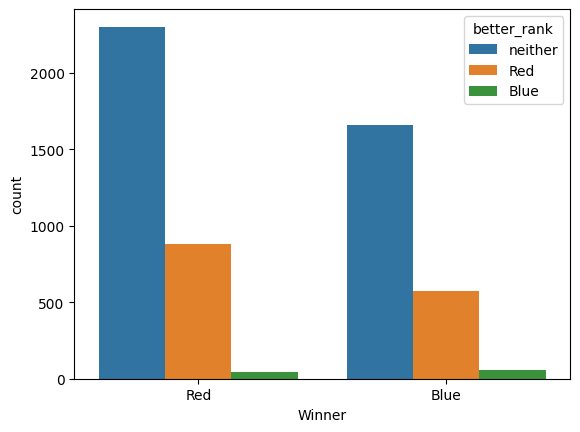

In [10]:
sns.countplot(x = ufc_data['Winner'], hue = ufc_data['better_rank'])

From the above graph we can see that __better_rank__ doesn't have an effect on the winner of the fight. So, we can drop this column.

### Fighter Stances

/var/folders/hc/hrt2r8b90zz5s9k_m560qnqr0000gp/T/ipykernel_47065/2936494356.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


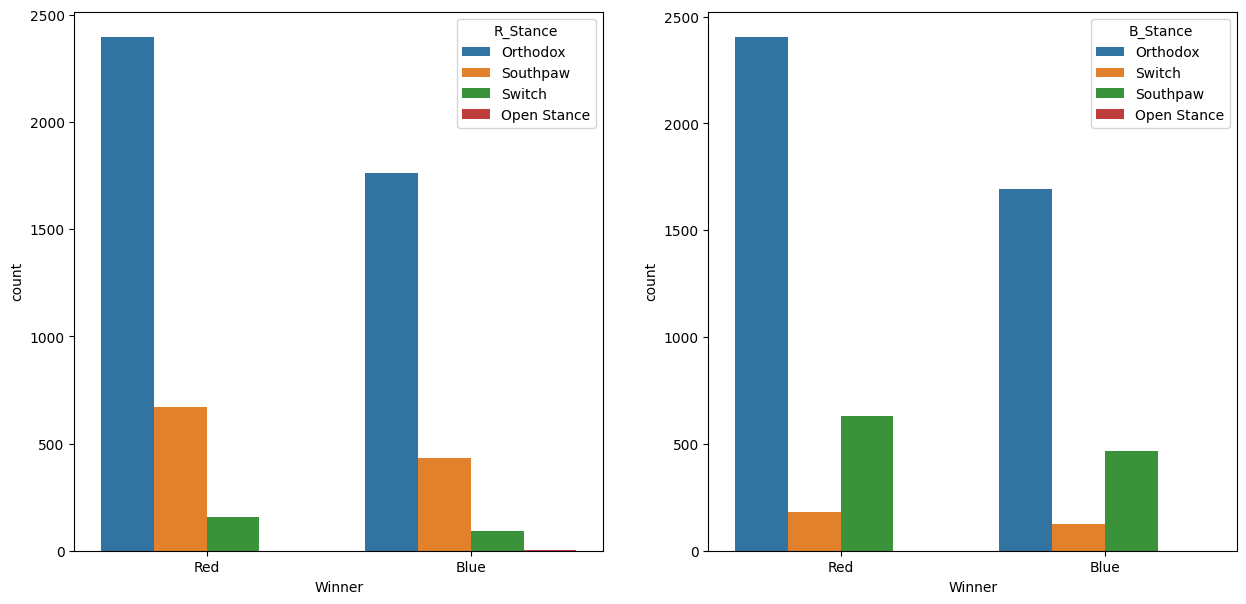

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(x = ufc_data['Winner'], hue = ufc_data['R_Stance'], ax=ax[0])
sns.countplot(x = ufc_data['Winner'], hue = ufc_data['B_Stance'], ax=ax[1])
fig.show()

From the countplots above it looks like fighters with orthodox stance have the most success. However, orthodox is the most common fighting stance, so that might not be the case. I won't be dropping this variable since from my knowledge of fighting, sometimes stances can make a big difference.

### Proportion of Missing data for the Features

In [4]:
pd.set_option('display.max_rows', 500)
ufc_data.isna().sum()/len(ufc_data)

R_fighter                       0.000000
B_fighter                       0.000000
R_odds                          0.001996
B_odds                          0.002721
R_ev                            0.001996
B_ev                            0.002903
date                            0.000000
Winner                          0.000000
title_bout                      0.000000
no_of_rounds                    0.000000
B_current_lose_streak           0.000000
B_current_win_streak            0.000000
B_draw                          0.000000
B_avg_SIG_STR_landed            0.168723
B_avg_SIG_STR_pct               0.138788
B_avg_SUB_ATT                   0.150943
B_avg_TD_landed                 0.151125
B_avg_TD_pct                    0.152758
B_longest_win_streak            0.000000
B_losses                        0.000000
B_total_rounds_fought           0.000000
B_total_title_bouts             0.000000
B_win_by_Decision_Majority      0.000000
B_win_by_Decision_Split         0.000000
B_win_by_Decisio

As we can see, some of the features/columns have __missing values__. We will deal with this later.

### Betting odds

<Axes: xlabel='R_odds', ylabel='B_odds'>

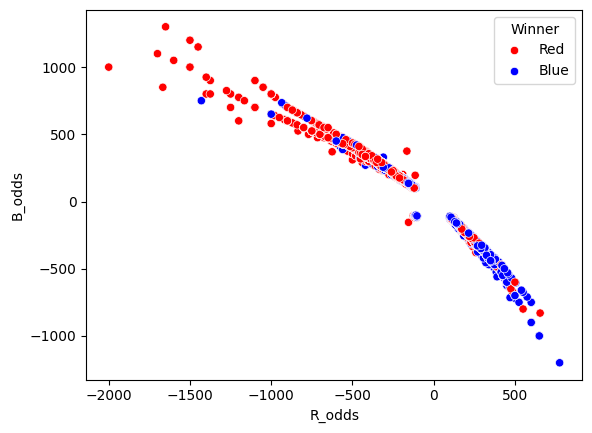

In [12]:
sns.scatterplot(data=ufc_data,x='R_odds', y='B_odds', hue='Winner',palette=['red','blue'])

Before analysing this plot, let me explain how betting odds work. Most sportsbooks use the so-called American odds. These odds are based on how much money you need to stake in order to win \\$100. The odds are always accompanied by a plus sign and a minus sign. These two determine whether you need to bet more or less than \\$100 to win \\$100 more. The favorite is represented with a minus sign, which means you need to stake more than \\$100 to win that much. On the other hand, a plus sign represents the underdog, which means you can stake less than \\$100 and still win \\$100.

Now that we have an understanding of how betting odds work, let's analyse this scatterplot. When Blues odds are higher and red odds are lower we have more red winners and when it's the opposite we have more blue winners. If we didn't know how betting odds worked, the scatterplot wouldn't have made intuitive sense. However, it does makes sense because the plot shows us that the favorite wins majority of the time.

### Number of rounds

<Axes: xlabel='Winner', ylabel='count'>

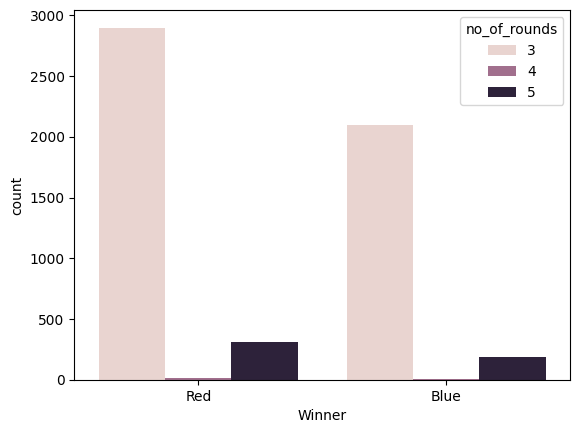

In [13]:
sns.countplot(x = ufc_data['Winner'], hue = ufc_data['no_of_rounds'])

__no_of_rounds__ doesn't seem to have an effect on the winner, so we can drop this column.

### Correlation Heatmap Between Predictors/Features

<Axes: >

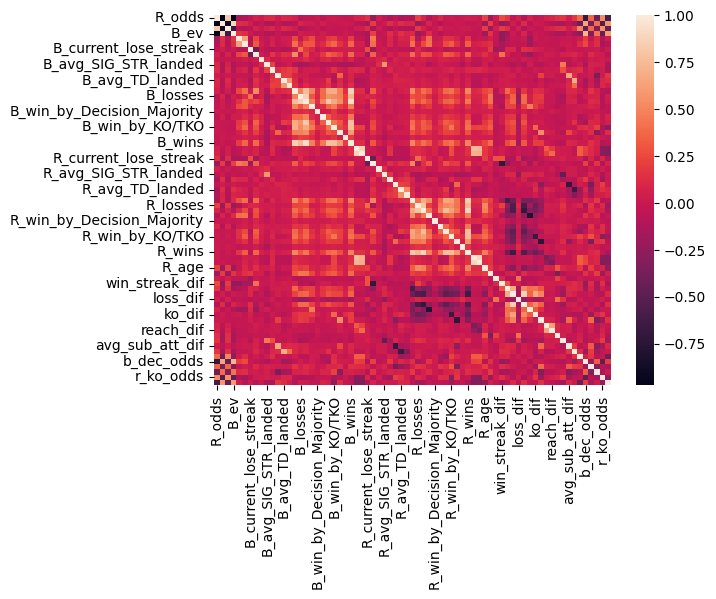

In [14]:
corr_mx = numeric_data.corr()
sns.heatmap(corr_mx)

From the heatmap above we can see that most of the variables have low correlations between each other, so we don't have to remove any features because of high pairwise correlations.

### Expected Value

<Axes: xlabel='R_ev', ylabel='B_ev'>

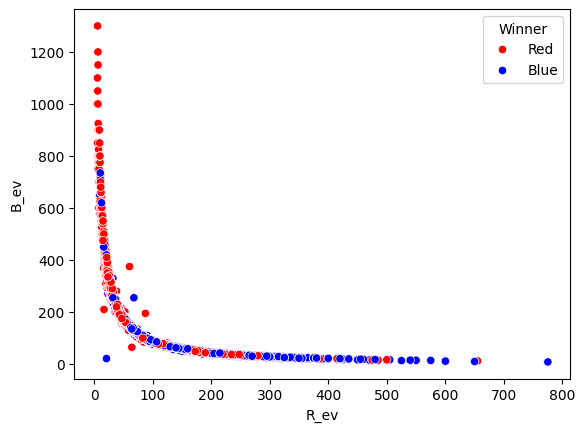

In [15]:
sns.scatterplot(data=ufc_data,x='R_ev', y='B_ev', hue='Winner', palette=['red','blue'])

Expected values signify how much money you would win on a $100 bet if your fighter wins. This is similar to the betting odds. Higher payouts represent the underdog and lower payouts represent the favorite in a fight. Once again, we can see that the betting favorites win majority of the time.

### Age

/var/folders/hc/hrt2r8b90zz5s9k_m560qnqr0000gp/T/ipykernel_47065/1820660521.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


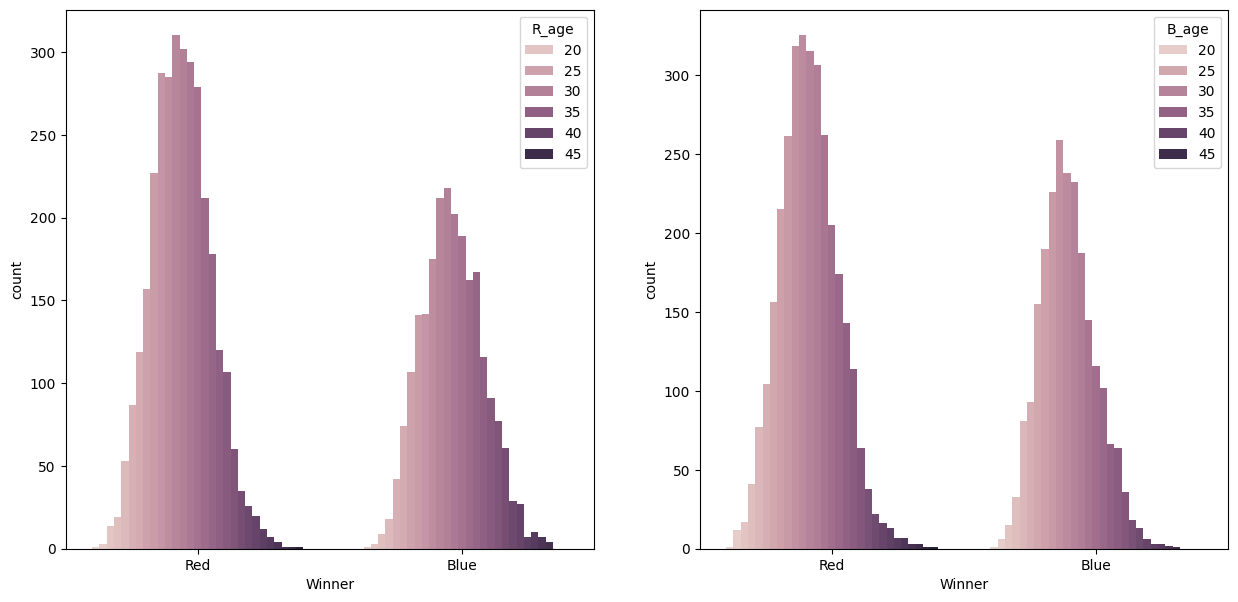

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(x = ufc_data['Winner'], hue = ufc_data['R_age'], ax=ax[0])
sns.countplot(x = ufc_data['Winner'], hue = ufc_data['B_age'], ax=ax[1])
fig.show()

From the plots above, it looks a majority of the winners are aged around 30. This makes sense since this is when MMA fighters enter the prime/peak of their careers.

### Significant Strikes 

<Axes: xlabel='R_avg_SIG_STR_landed', ylabel='B_avg_SIG_STR_landed'>

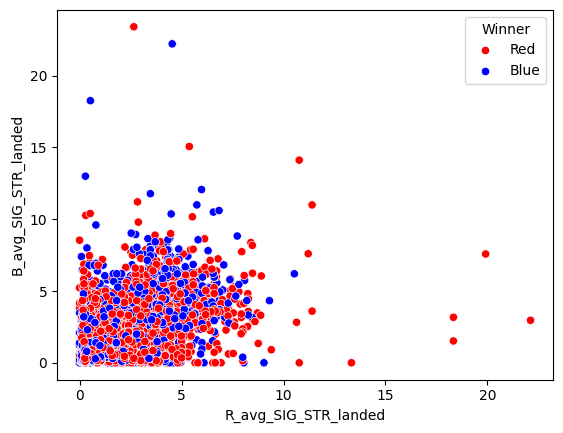

In [17]:
sns.scatterplot(data=ufc_data,x='R_avg_SIG_STR_landed', y='B_avg_SIG_STR_landed', hue='Winner', palette=['red','blue'])

From this plot it's hard to see a relationship between significant strikes landed and the winner. Let's take a look at the percentage of average significant strikes landed to see if we can spot a relationship with the winner.

<Axes: xlabel='R_avg_SIG_STR_pct', ylabel='B_avg_SIG_STR_pct'>

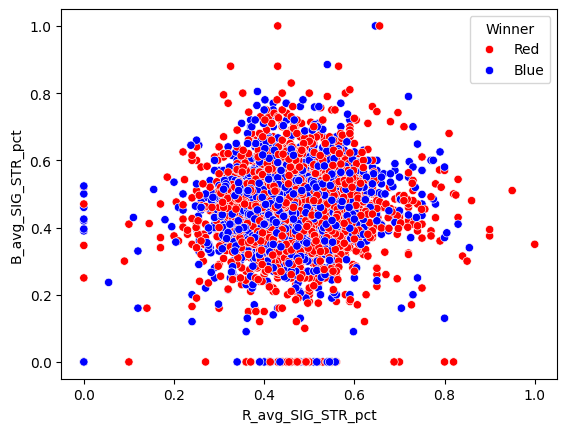

In [18]:
sns.scatterplot(data=ufc_data,x='R_avg_SIG_STR_pct', y='B_avg_SIG_STR_pct', hue='Winner', palette=['red','blue'])

From this plot we can see a relationship between percentage of average significant strikes landed and winner a little more clearly. When one fighter has a significantly higher percentage of average significant strikes landed than their opponent, they seem to win.

### Feature Engineering and Data Cleaning

Since we have engineered some of the red and blue variables into one. Let's drop those red and blue columns and
keep the engineered columns.

In [ ]:
engineered_features = ['B_current_lose_streak','R_current_lose_streak','B_current_win_streak','R_current_win_streak',
                      'B_avg_SIG_STR_landed','R_avg_SIG_STR_landed','B_longest_win_streak','R_longest_win_streak',
                      'B_wins','R_wins','B_losses','R_losses','B_total_rounds_fought','R_total_rounds_fought',
                      'B_total_title_bouts','R_total_title_bouts','B_win_by_KO/TKO','R_win_by_KO/TKO',
                      'B_Height_cms','R_Height_cms','B_Reach_cms','R_Reach_cms','B_age','R_age','B_win_by_Submission',
                      'R_win_by_Submission','B_avg_SUB_ATT','R_avg_SUB_ATT','B_avg_TD_landed','R_avg_TD_landed',
                      'B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous',
                      'B_win_by_TKO_Doctor_Stoppage','R_win_by_Decision_Majority','R_win_by_Decision_Split',
                      'R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage']

ufc_final = ufc_data.drop(engineered_features, axis=1)

Engineering a few more features:

In [ ]:
ufc_final['sig_str_pct_diff'] = ufc_final['B_avg_SIG_STR_pct'] - ufc_final['R_avg_SIG_STR_pct']
ufc_final['avg_td_pct_diff'] = ufc_final['B_avg_TD_pct'] - ufc_final['R_avg_TD_pct']
ufc_final['draw_diff'] = ufc_final['B_draw'] - ufc_final['R_draw']
ufc_final = ufc_final.drop(['B_avg_SIG_STR_pct','R_avg_SIG_STR_pct','B_avg_TD_pct','R_avg_TD_pct','B_draw','R_draw'],axis=1)

Since I will be predicting the outcomes for the ufc 281 event, I will be dropping all the rows from that event and all the rows of fights that happened after that event.

In [ ]:
ufc_final = ufc_final.iloc[41:,].reset_index().drop('index',axis=1)

Let's __remove__ some __unnecessary__ columns. 

In [ ]:
ufc_final = ufc_final.drop(['date','R_fighter','B_fighter','no_of_rounds','better_rank'],axis=1)

<Axes: xlabel='Winner', ylabel='count'>

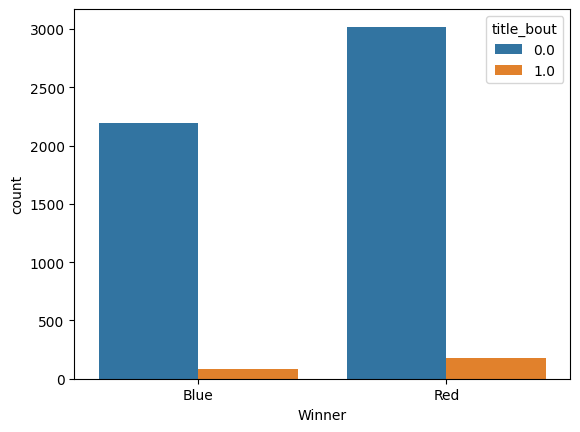

In [24]:
sns.countplot(x = ufc_final['Winner'], hue = ufc_final['title_bout'])

Whether the fight is a title fight or not, seems to have no effect on the winner. So, we can drop this column.

In [25]:
ufc_final = ufc_final.drop('title_bout',axis=1)

In [129]:
ufc_final.head()

,R_odds,B_odds,R_ev,B_ev,Winner,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,sig_str_pct_diff,avg_td_pct_diff,draw_diff
0,105.0,-125.0,105.000000,80.000000,Blue,Orthodox,Orthodox,-1,0,-1,4,3,13,0,0,5,10.16,2.54,2,0.04,0.7,-0.11,280.0,300.0,2000.0,240.0,280.0,900.0,-0.06,0.10,0
1,-220.0,180.0,45.454545,180.000000,Blue,Orthodox,Southpaw,-3,1,-1,1,0,-4,-2,-1,2,2.54,5.08,-1,-1.33,1.4,1.10,380.0,750.0,800.0,800.0,115.0,330.0,-0.06,0.07,0
2,-400.0,310.0,25.000000,310.000000,Red,Orthodox,Orthodox,0,0,0,3,3,16,0,2,-1,0.00,-10.16,9,-0.07,-0.9,-2.33,-115.0,550.0,340.0,2200.0,450.0,800.0,-0.07,-0.33,0
3,-180.0,155.0,55.555556,155.000000,Red,Orthodox,Switch,0,-1,-1,0,3,6,0,-1,-1,0.00,-2.54,-5,-0.72,-2.4,-3.64,300.0,500.0,300.0,500.0,225.0,700.0,-0.06,-0.36,0
4,145.0,-170.0,145.000000,58.823529,Red,Switch,Orthodox,0,1,0,-2,-3,-15,0,1,-1,-2.54,0.00,0,3.51,-1.0,-2.39,300.0,500.0,600.0,1500.0,400.0,120.0,0.13,-0.37,-1


## Missing data

Let's deal with the missing data since machine learning models don't work well with missing data.

Let's look at the ___Stance__ variables.

In [27]:
print(ufc_final['B_Stance'].isna().sum()/len(ufc_final))
print(ufc_final['R_Stance'].isna().sum()/len(ufc_final))

0.0010966916468652897
0.00018278194114421494


As we can see, very few rows are missing for these columns. However, let's fill these missing values with the most
frequent stance.

In [28]:
ufc_final['B_Stance'].mode()[0]

'Orthodox'

In [29]:
ufc = ufc_final.copy()
ufc['B_Stance'] = ufc_final['B_Stance'].fillna(value=ufc_final['B_Stance'].mode()[0])
ufc['R_Stance'] = ufc_final['R_Stance'].fillna(value=ufc_final['R_Stance'].mode()[0])
ufc.isna().sum()/len(ufc)

R_odds                    0.001097
B_odds                    0.002011
R_ev                      0.001097
B_ev                      0.002193
Winner                    0.000000
B_Stance                  0.000000
R_Stance                  0.000000
lose_streak_dif           0.000000
win_streak_dif            0.000000
longest_win_streak_dif    0.000000
win_dif                   0.000000
loss_dif                  0.000000
total_round_dif           0.000000
total_title_bout_dif      0.000000
ko_dif                    0.000000
sub_dif                   0.000000
height_dif                0.000000
reach_dif                 0.000000
age_dif                   0.000000
sig_str_dif               0.172363
avg_sub_att_dif           0.000000
avg_td_dif                0.000000
r_dec_odds                0.154085
b_dec_odds                0.161214
r_sub_odds                0.199050
b_sub_odds                0.205447
r_ko_odds                 0.199415
b_ko_odds                 0.205812
sig_str_pct_diff    

In [32]:
ufc_df = ufc.dropna().reset_index().drop('index',axis=1)
ufc_df.isna().sum()

R_odds                    0
B_odds                    0
R_ev                      0
B_ev                      0
Winner                    0
B_Stance                  0
R_Stance                  0
lose_streak_dif           0
win_streak_dif            0
longest_win_streak_dif    0
win_dif                   0
loss_dif                  0
total_round_dif           0
total_title_bout_dif      0
ko_dif                    0
sub_dif                   0
height_dif                0
reach_dif                 0
age_dif                   0
sig_str_dif               0
avg_sub_att_dif           0
avg_td_dif                0
r_dec_odds                0
b_dec_odds                0
r_sub_odds                0
b_sub_odds                0
r_ko_odds                 0
b_ko_odds                 0
sig_str_pct_diff          0
avg_td_pct_diff           0
draw_diff                 0
dtype: int64

Now, our data does not have any __missing values__.

Before fitting our model let's just look at the proportion of blue and red winners.

In [33]:
ufc_df['Winner'].value_counts()/len(ufc_df)

Winner
Red     0.579465
Blue    0.420535
Name: count, dtype: float64

From the proportion of blue and red winners we can see that the data is fairly balanced.

## Model Training and Evaluation on Data using k-fold cross validation

In [34]:
from sklearn.model_selection import (
  train_test_split, 
  StratifiedKFold,
  cross_val_score, 
  GridSearchCV,
  RandomizedSearchCV
)
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import (
  MinMaxScaler, 
  KBinsDiscretizer, 
  StandardScaler
)

from sklearn.pipeline import (
  Pipeline, 
  make_pipeline,
  FeatureUnion
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import (
    RandomForestClassifier
)


In [35]:
ufc_df['R_Stance'].unique()

array(['Orthodox', 'Southpaw', 'Switch'], dtype=object)

In [36]:
map_stance = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
ufc_df['B_Stance'] = ufc_df['B_Stance'].replace(map_stance)
ufc_df['R_Stance'] = ufc_df['R_Stance'].replace(map_stance)

map_winner = {'Red': 0, 'Blue': 1, 'Draw': 2}
ufc_df['Winner'] = ufc_df['Winner'].replace(map_winner)

ufc_df

,R_odds,B_odds,R_ev,B_ev,Winner,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,sig_str_pct_diff,avg_td_pct_diff,draw_diff
0,105.0,-125.0,105.000000,80.000000,1,0,0,-1,0,-1,4,3,13,0,0,5,10.16,2.54,2,0.040000,0.700000,-0.110000,280.0,300.0,2000.0,240.0,280.0,900.0,-0.060000,0.100000,0
1,-220.0,180.0,45.454545,180.000000,1,0,2,-3,1,-1,1,0,-4,-2,-1,2,2.54,5.08,-1,-1.330000,1.400000,1.100000,380.0,750.0,800.0,800.0,115.0,330.0,-0.060000,0.070000,0
2,-400.0,310.0,25.000000,310.000000,0,0,0,0,0,0,3,3,16,0,2,-1,0.00,-10.16,9,-0.070000,-0.900000,-2.330000,-115.0,550.0,340.0,2200.0,450.0,800.0,-0.070000,-0.330000,0
3,-180.0,155.0,55.555556,155.000000,0,0,1,0,-1,-1,0,3,6,0,-1,-1,0.00,-2.54,-5,-0.720000,-2.400000,-3.640000,300.0,500.0,300.0,500.0,225.0,700.0,-0.060000,-0.360000,0
4,145.0,-170.0,145.000000,58.823529,0,1,0,0,1,0,-2,-3,-15,0,1,-1,-2.54,0.00,0,3.510000,-1.000000,-2.390000,300.0,500.0,600.0,1500.0,400.0,120.0,0.130000,-0.370000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,130.0,-140.0,130.000000,71.428571,0,0,0,-1,-2,-1,-2,2,-6,0,-1,-1,2.54,-2.54,1,2.447222,1.833333,0.166667,378.0,411.0,600.0,1640.0,450.0,150.0,0.146667,0.223333,0
3658,150.0,-160.0,150.000000,62.500000,0,2,2,0,-1,2,0,3,-5,-1,1,-3,-10.16,-12.70,-1,-0.097620,1.050000,0.650000,309.0,135.0,475.0,485.0,1330.0,632.0,-0.105167,0.065500,0
3659,123.0,-133.0,123.000000,75.187970,1,2,0,0,1,-1,-8,4,-27,-1,-2,-3,-2.54,-10.16,6,0.243730,0.275000,0.950000,240.0,200.0,1275.0,1615.0,575.0,265.0,0.233500,-0.246000,0
3660,-210.0,190.0,47.619048,190.000000,1,0,0,0,0,0,1,-2,7,0,4,-2,15.24,5.08,4,0.056740,-1.027778,-1.111111,325.0,665.0,105.0,940.0,1195.0,460.0,0.053333,-0.148889,0


### Data Splitting

In [37]:
X = ufc_df.drop('Winner', axis=1)
y = ufc_df['Winner']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(array([1697., 1232.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

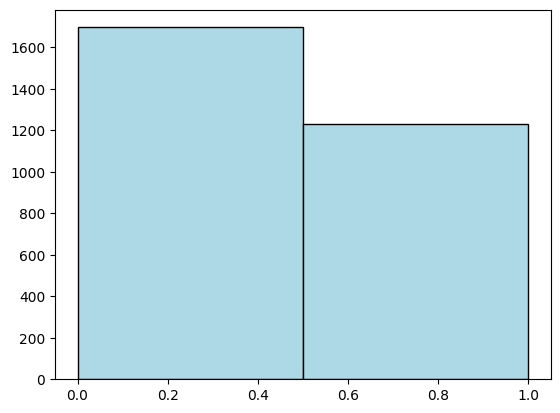

In [40]:
plt.hist(y_train, bins=2, color="lightblue", edgecolor="black")

(array([425., 308.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

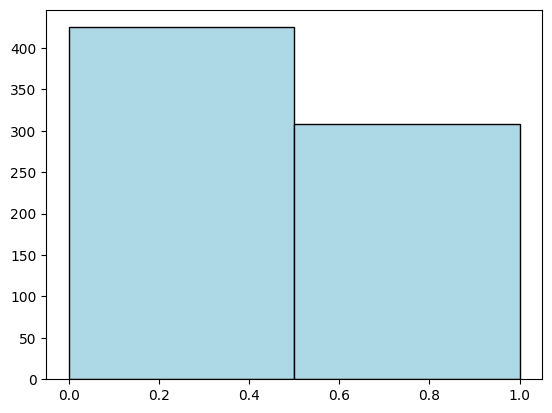

In [41]:
plt.hist(y_test, bins=2, color="lightblue", edgecolor="black")

As we can see from the plots above, the data has been split in such a way that both the training and test set have the same class dsitributions for the __Winner__ variable.

### Cross Validation

We will be using Stratified k-fold cross-validation, which is a technique used to evaluate the performance of a machine learning model while ensuring that each fold maintains the same class distribution as the original dataset. 

Here's a breakdown of the process:

Stratification: The dataset is first divided into k subsets, or "folds," while preserving the proportion of each class in every fold. This ensures that each fold is a representative sample of the overall class distribution.

Training and Testing: The model is trained k times, each time using k-1 folds for training and the remaining fold for testing. This process is repeated k times, with each fold serving as the test set exactly once.

Evaluation: The performance metrics (e.g., accuracy, precision, recall) are calculated for each iteration. The final evaluation is often an average or aggregate of these metrics over all k folds.

By ensuring that each fold has a similar class distribution, the evaluation becomes more robust and reflective of the model's generalization performance on different class instances. This helps in obtaining a more reliable estimate of the model's performance.

In [42]:
seed = 42
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

Now that we have preprocessed our data and split it into a training and test set, let's fit some models. Before we start fitting models, __let me explain a few terminologies__.

#### Hyperparameter Tuning

Hyperparameter tuning is a crucial step in the process of training machine learning models. Hyperparameters are external configuration settings that are not learned from the data but are set prior to the training process. Hyperparameter tuning involves finding the optimal values for these hyperparameters to achieve the best performance of the model. 

#### Accuracy

For this project, the data is fairly balanced. What this means is that the data has a similar proportion of winners for both red and blue fighters. Since we have balanced data, we will be using __Accuracy__ to evaluate the performance of our classification models. __Accuracy__ measures the ratio of correctly predicted instances to the total instances in the dataset.

### Logistic Regression

In [43]:
seed = 42
np.random.seed(seed)
base_log = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(base_log, X_train, y_train, cv=kfold)
print("Default Logistic Regression Best Accuracy Score: {}".format(scores.mean()))

Default Logistic Regression Best Accuracy Score: 0.6490265744873253


Let's see if we can improve the Accuracy with some hyperparameter tuning:

In [44]:
seed = 42
np.random.seed(seed)

params = {"penalty": ["l1", "l2"],
         "C": [0.01,0.1, 1, 10],
         "solver" : ['liblinear']}

log_reg = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(),
                                 param_grid=params,
                                 cv=kfold,
                                 refit=True))


result = log_reg.fit(X_train, y_train)
log_reg_model = result.named_steps["gridsearchcv"]

In [45]:
print("Tuned Logistic Regression Parameters: {}".format(log_reg_model.best_estimator_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(log_reg_model.best_score_))

Tuned Logistic Regression Parameters: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Tuned Logistic Regression Best Accuracy Score: 0.6510772731250547


After hyperparameter tuning we increased the model accuracy on the training set by 0.2%. 

### Random Forests

In [47]:
rf = RandomForestClassifier(random_state = 42)

In [48]:
seed = 42
np.random.seed(seed)
scores = cross_val_score(rf, X_train, y_train, cv=kfold)
print("Default Random Forest Best Accuracy Score: {}".format(scores.mean()))

Default Random Forest Best Accuracy Score: 0.623764184242


Let's see if we can improve the Accuracy with some hyperparameter tuning:

After tuning with a larger grid using RandomSearchCV I narrowed the grid down to a smaller set of values. I haven't included that code chunk here beacuse it takes too long to run.

In [49]:
seed = 42
np.random.seed(seed)
narrowed_grid = {
 'max_depth': [3,4,5],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [2,4,6],
 'n_estimators': [200,300]}

narrow_search = GridSearchCV(estimator = rf, param_grid = narrowed_grid, 
                          cv = kfold, n_jobs = -1)

narrow_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 300]})

In [51]:
print("Tuned Random Forests Parameters: {}".format(narrow_search.best_estimator_))
print("Tuned Random Forests Best Accuracy Score: {}".format(narrow_search.best_score_))

Tuned Random Forests Parameters: RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=300, random_state=42)
Tuned Random Forests Best Accuracy Score: 0.6439088708030687


In [52]:
narrow_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 300}

After hyperparameter tuning, the model accuracy is 64.4%, which is an increase of by about 2%. 

### KNN (K-Nearest Neighbors)

In [53]:
seed = 42
np.random.seed(seed)
base_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_val_score(base_knn, X_train, y_train, cv=kfold)
print("Default KNN Best Accuracy Score: {}".format(scores.mean()))

Default KNN Best Accuracy Score: 0.5845010355590561


Let's see if we can improve the Accuracy with some hyperparameter tuning:

In [131]:
seed = 42
np.random.seed(seed)

knn_grid = {
    'leaf_size' : list(range(1,50)),
    'n_neighbors': list(range(1,30)),
    'p':[1,2]
}

knn_search = make_pipeline(StandardScaler(), 
                    GridSearchCV(KNeighborsClassifier(),
                                 param_grid=knn_grid,
                                 cv=kfold,
                                 refit=True))


knn_result = knn_search.fit(X_train, y_train)


In [132]:
knn_model = knn_result.named_steps["gridsearchcv"]

In [133]:
print("Tuned KNN Parameters: {}".format(knn_model.best_estimator_))
print("Tuned KNN Best Accuracy Score: {}".format(knn_model.best_score_))

Tuned KNN Parameters: KNeighborsClassifier(leaf_size=1, n_neighbors=29, p=1)
Tuned KNN Best Accuracy Score: 0.627175986698171


After hyperparameter tuning, the model accuracy is 62.7%, which is an increase of about 4.3%.

### Neural Networks

In [134]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [135]:
optimizer = Adam(learning_rate=0.001)

NN_model = Sequential([layers.Input(X_train.shape[1]),
                       layers.Dense(128, activation ='sigmoid'),
                       layers.Dense(64, activation ='sigmoid'),
                       layers.Dense(64, activation ='sigmoid'),
                       layers.Dense(32, activation ='sigmoid'),
                       # layers.Dense(16, activation ='sigmoid'),
                       layers.Dense(2, activation = 'softmax')])

NN_model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#NN_model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),epochs=50)


In [147]:
from scikeras.wrappers import KerasClassifier

seed = 42
np.random.seed(seed)

NNmodel = KerasClassifier(build_fn=NN_model, epochs=30, batch_size=10, verbose=0)
results = cross_val_score(NNmodel, X_train, y_train, cv=kfold)


INFO:tensorflow:Assets written to: ram://6f01e1a9538446228fcf15c8963230a4/assets


INFO:tensorflow:Assets written to: ram://6f01e1a9538446228fcf15c8963230a4/assets
2023-12-15 20:11:53.017284: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://6e2df274757d4f8a97d23fc24ba680f9: INVALID_ARGUMENT: ram://6e2df274757d4f8a97d23fc24ba680f9 is a directory.
/Users/karanswamy/PycharmProjects/Pstat131/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://9b5f04e2af4347d496ef5024a4d1a448/assets


INFO:tensorflow:Assets written to: ram://9b5f04e2af4347d496ef5024a4d1a448/assets
2023-12-15 20:12:00.917158: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2abebb249b0749a397ad992e6c147435: INVALID_ARGUMENT: ram://2abebb249b0749a397ad992e6c147435 is a directory.
/Users/karanswamy/PycharmProjects/Pstat131/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://fe77cc6085f94ff8ac70dea2dfdd53ec/assets


INFO:tensorflow:Assets written to: ram://fe77cc6085f94ff8ac70dea2dfdd53ec/assets
2023-12-15 20:12:08.753785: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://295957135bf9408496a49ed548d31113: INVALID_ARGUMENT: ram://295957135bf9408496a49ed548d31113 is a directory.
/Users/karanswamy/PycharmProjects/Pstat131/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://4f83b383e6844136b56f4b1c1c601910/assets


INFO:tensorflow:Assets written to: ram://4f83b383e6844136b56f4b1c1c601910/assets
2023-12-15 20:12:17.625170: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://6ee5f4ded9bb4a699342a7274caaa608: INVALID_ARGUMENT: ram://6ee5f4ded9bb4a699342a7274caaa608 is a directory.
/Users/karanswamy/PycharmProjects/Pstat131/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://2e290317cbab447e9a6debf070ec7153/assets


INFO:tensorflow:Assets written to: ram://2e290317cbab447e9a6debf070ec7153/assets
2023-12-15 20:12:25.831841: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://eb30a071081b47e8a62c217fc26737f9: INVALID_ARGUMENT: ram://eb30a071081b47e8a62c217fc26737f9 is a directory.
/Users/karanswamy/PycharmProjects/Pstat131/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [148]:
nn_score = results.mean()
nn_score

0.6507394766780432

In [149]:
results

array([0.63651877, 0.66382253, 0.62627986, 0.66040956, 0.66666667])

After hyperparameter tuning, the model accuracy is 65.07%. 

### Gradient Boosting

In [70]:
from xgboost.sklearn import XGBClassifier
from sklearn.datasets import make_classification
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

seed = 42
np.random.seed(seed)
xgb = XGBClassifier(objective='binary:logistic',random_state =42, use_label_encoder=False)
scores = cross_val_score(xgb, X_train, y_train, cv=kfold)
print("Default XGBoost Best Accuracy Score: {}".format(scores.mean()))

Default XGBoost Best Accuracy Score: 0.6049835185671364


In [89]:
seed = 42
np.random.seed(seed)

# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.05,0.1,0.15,0.2,0.25, 0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9,1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100]),
    'n_estimators': hp.choice('n_estimators', [5,10,15,20,25,30])
}

# Objective function
def objective(params):
    
    xgboost = XGBClassifier(random_state=42, **params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='accuracy', 
                            n_jobs=-1).mean()

    # Loss is negative score
    loss = - score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}


# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 200, trials = Trials())

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:20<00:00,  9.96trial/s, best loss: -0.6480079344243166]


In [90]:
# Print the index of the best parameters
print(best)

# Print the values of the best parameters
print(space_eval(space, best))

{'colsample_bytree': 3, 'gamma': 2, 'learning_rate': 8, 'max_depth': 0, 'n_estimators': 3, 'reg_alpha': 4, 'reg_lambda': 5}
{'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20, 'reg_alpha': 10, 'reg_lambda': 100}


After hyperparameter tuning, the model accuracy is 65%, which is an increase of about 5%.

## Evaluating The Best Models on The Test Set 

Let's look at the results of our model after using k-fold cross validation on our __training set__:

Model | Accuracy |
---|---|
Logistic Regression | 65.11%
Random Forests | 64.39%
KNN | 62.71%
Neural Networks | 65.07%
XGBoost | 65.00%


From the above results, the 3 best models are : Logistic Regression, Neural Networks, and XGboost. Now let's fit our 3 best performing models on the testing set and pick the best one.

### Fitting the 3 best models to the Testing set

#### Logistic Regression

In [67]:
seed = 42
np.random.seed(seed)

final_log_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
final_log_model.fit(X_train_scaled, y_train)
y_pred = final_log_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6398362892223738

__Accuracy = 63.98%__

#### Neural Networks

In [101]:
seed = 42
np.random.seed(seed)

optimizer = Adam(learning_rate=0.001)

NN_model_final = Sequential([layers.Input(X_train.shape[1]),
                       layers.Dense(128, activation ='sigmoid'),
                       layers.Dense(64, activation ='sigmoid'),
                       layers.Dense(64, activation ='sigmoid'),
                       layers.Dense(32, activation ='sigmoid'),
                       # layers.Dense(16, activation ='sigmoid'),
                       layers.Dense(2, activation = 'softmax')])

NN_model_final.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [108]:
seed = 42
np.random.seed(seed)

history = NN_model_final.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),epochs=30, batch_size=10)

Epoch 1/30
293/293 [==============================] - 1s 2ms/step - loss: 0.6182 - accuracy: 0.6596 - val_loss: 0.6404 - val_accuracy: 0.6194
Epoch 2/30
293/293 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6538 - val_loss: 0.6416 - val_accuracy: 0.6194
Epoch 3/30
293/293 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6538 - val_loss: 0.6468 - val_accuracy: 0.6276
Epoch 4/30
293/293 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6524 - val_loss: 0.6424 - val_accuracy: 0.6221
Epoch 5/30
293/293 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.6531 - val_loss: 0.6470 - val_accuracy: 0.6221
Epoch 6/30
293/293 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.6490 - val_loss: 0.6414 - val_accuracy: 0.6221
Epoch 7/30
293/293 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6470 - val_loss: 0.6485 - val_accuracy: 0.6262
Epoch 

In [109]:
print("Evaluate on test data")
results = NN_model_final.evaluate(X_test, y_test, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
74/74 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.6248
test loss, test acc: [0.643751859664917, 0.6248294711112976]


__Accuracy = 62.48%__

#### XGboost

In [91]:
seed = 42
np.random.seed(seed)

final_xgb_model = XGBClassifier(random_state=42, colsample_bytree=0.4, gamma=0.2, learning_rate=0.35, max_depth=3, 
                                n_estimators=15, reg_alpha=0.01, reg_lambda=100)

final_xgb_model.fit(X_train, y_train)
y_pred = final_xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6302864938608458

__Accuracy = 62.48%__

Let's look at the results of our model on our __testing set__:

Model | Accuracy |
---|---|
Logistic Regression | 63.98%
Neural Networks | 62.48%
XGBoost | 63.03%

Our best performing model on the test set is the __Logistic Regression Model__!

## UFC 281

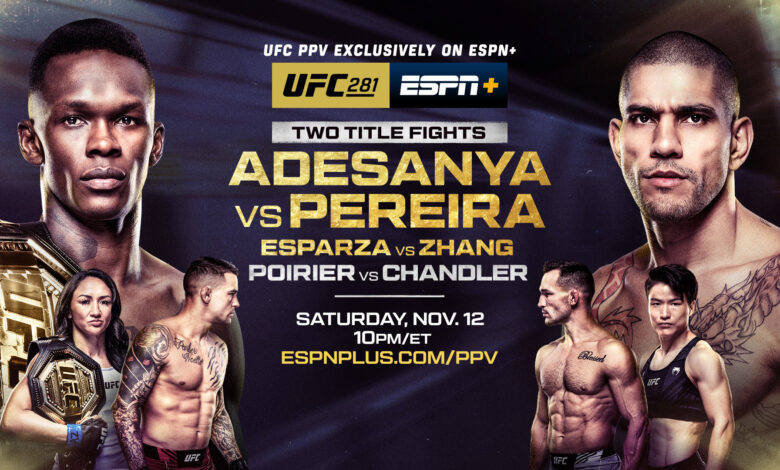

In addition to evaluating our model on our test set, let's see how well our best model predicts a UFC pay-per-view event. We will be trying to predict the outcomes of UFC 281.

Let's load in the data for UFC 281.

In [54]:
ufc_281 = pd.read_csv("data/most_recent_ppv_final.csv")
ufc_281

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,Winner,title_bout,no_of_rounds,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,sig_str_pct_diff,avg_td_pct_diff,draw_diff
0,Israel Adesanya,Alex Pereira,-230,190,43.478261,190.000000,2022-11-12,Blue,1,5,Orthodox,Switch,0,0,-6,-9,-1,-42,-8,-2,0,0.00,-2.54,2,1.30,-0.2,0.27,Red,115,600,1400,2800,310,230,0.09,0.86,0
1,Carla Esparza,Zhang Weili,310,-400,310.000000,25.000000,2022-11-12,Blue,1,5,Switch,Orthodox,0,-5,-1,-4,-2,-21,1,1,0,7.62,0.00,-2,3.63,0.2,-1.25,Blue,475,180,1400,900,1600,-105,0.07,-0.01,0
2,Dustin Poirier,Michael Chandler,-220,180,45.450000,180.000000,2022-11-12,Red,0,3,Orthodox,Southpaw,-1,1,-2,-17,-5,-57,-2,-8,-2,-2.54,-2.54,3,-0.62,-0.3,0.78,Red,300,600,700,900,130,360,-0.04,0.02,0
3,Frankie Edgar,Chris Gutierrez,200,-240,200.000000,41.666667,2022-11-12,Blue,0,3,Orthodox,Orthodox,-2,6,-2,-12,-9,-77,-9,-3,-2,7.62,-2.54,-10,0.93,-0.2,-1.85,Red,320,160,1500,1000,800,200,0.18,0.06,0
4,Dan Hooker,Claudio Puelles,-155,130,64.516129,130.000000,2022-11-12,Red,0,3,Southpaw,Switch,-2,5,1,-6,-7,-28,1,-6,1,-5.08,-7.62,-6,-3.01,1.1,1.56,Red,200,600,1200,240,240,900,0.02,-0.06,0


In [60]:
map_stance = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
ufc_281['B_Stance'] = ufc_281['B_Stance'].replace(map_stance)
ufc_281['R_Stance'] = ufc_281['R_Stance'].replace(map_stance)

map_winner = {'Red': 0, 'Blue': 1, 'Draw': 2}
ufc_281['Winner'] = ufc_281['Winner'].replace(map_winner)
ufc_281 = ufc_281.drop(['R_fighter','B_fighter','date','title_bout','no_of_rounds','better_rank'],axis=1)
ufc_281

,R_odds,B_odds,R_ev,B_ev,Winner,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,sig_str_pct_diff,avg_td_pct_diff,draw_diff
0,-230,190,43.478261,190.000000,1,0,1,0,0,-6,-9,-1,-42,-8,-2,0,0.00,-2.54,2,1.30,-0.2,0.27,115,600,1400,2800,310,230,0.09,0.86,0
1,310,-400,310.000000,25.000000,1,1,0,0,-5,-1,-4,-2,-21,1,1,0,7.62,0.00,-2,3.63,0.2,-1.25,475,180,1400,900,1600,-105,0.07,-0.01,0
2,-220,180,45.450000,180.000000,0,0,2,-1,1,-2,-17,-5,-57,-2,-8,-2,-2.54,-2.54,3,-0.62,-0.3,0.78,300,600,700,900,130,360,-0.04,0.02,0
3,200,-240,200.000000,41.666667,1,0,0,-2,6,-2,-12,-9,-77,-9,-3,-2,7.62,-2.54,-10,0.93,-0.2,-1.85,320,160,1500,1000,800,200,0.18,0.06,0
4,-155,130,64.516129,130.000000,0,2,1,-2,5,1,-6,-7,-28,1,-6,1,-5.08,-7.62,-6,-3.01,1.1,1.56,200,600,1200,240,240,900,0.02,-0.06,0


In [ ]:
X = ufc_281.drop('Winner',axis=1)

In [65]:
y = ufc_281['Winner'].values
y

array([1, 1, 0, 1, 0])

In [68]:
final_log_model.predict(X)

/Users/karanswamy/PycharmProjects/Pstat131/venv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 0, 1, 0])

### Israel Adesanya	VS Alex Pereira	

__Model Predicted Winner__ : Israel Adesanya

__Actual Winner__ : Alex Pereira

### Carla Esparza VS Zhang Weili

__Model Predicted Winner__ : Zhang Weili

__Actual Winner__ : Zhang Weili

### Dustin Poirier VS Michael Chandler

__Model Predicted Winner__ : Dustin Poirier

__Actual Winner__ : Dustin Poirier

### Frankie Edgar VS Chris Gutierrez

__Model Predicted Winner__ :  Chris Gutierrez

__Actual Winner__ :  Chris Gutierrez

### Dan Hooker VS Claudio Puelles

__Model Predicted Winner__ : Dan Hooker

__Actual Winner__ : Dan Hooker

It looks like our model did pretty well on this particular event! It predicted the right result for all the fights except the fight between Israel Adesanya and Alex Pereira. If I was looking at just the stats I would've gone with Israel Adesanya too! But the model doesn't know that Alex Pereira beat Israel Adesanya twice in kickboxing(not mma). 

## Final Thoughts

This was a fun project because of the freedom to work with dataset of my choice. This class was taught in R, so doing it in Python was a great learning experience for me. The final model I ended up with had an accuracy of about 64% on the test set. That’s not bad! There’s certainly room for improvement, but at the same time when we’re trying to predict something as unpredictable as fighting, it’s hard to have a high accuracy. Some features that I can add in the future and experiment with are strikes landed on a fighter by an opponent and takedown defense of a fighter. These added features and some better feature engineering could make the model better.

The logistic regression was the best model while the worst model was the KNN model. It didn’t surprise me that the KNN model did the worst since we were working with a large number of features. I expected either the Random forests or XGBoost model to do the best. What surprised me was that the simple logistic regression model outperformed the more complex models. I was hoping that after the time consuming hyperparameter tuning I did, XGBoost or Neural networks would do better. I think with a lot more data, Neural Networks could be the best performing model. Sometimes simple is just better!